<a href="https://colab.research.google.com/github/rufth/T7_Wast_Class/blob/main/ECO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to your dataset
dataset_path = "/content/drive/MyDrive/Dataset/ECO"
print(os.listdir(dataset_path))  # should list class folders


['ECO_M', 'ECO_F', 'Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic']


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2699 images belonging to 7 classes.
Found 672 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1195s 14s/step - accuracy: 0.7141 - loss: 0.7702 - val_accuracy: 0.8244 - val_loss: 0.4867
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.9312 - loss: 0.1954 - val_accuracy: 0.8601 - val_loss: 0.3841
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9599 - loss: 0.1224 - val_accuracy: 0.8571 - val_loss: 0.4221
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.9794 - loss: 0.0695 - val_accuracy: 0.8765 - val_loss: 0.3776
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9938 - loss: 0.0467 - val_accuracy: 0.8765 - val_loss: 0.3567
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9968 - loss: 0.0277 - val_accuracy: 0.8824 - val_loss: 0.3688
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9988 - loss: 0.0230 - val_accuracy: 0.8780 - val_loss: 0.4001
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9997 - loss: 0.0127 - val_accuracy: 0.8705 -

In [ ]:
model.save("/content/drive/MyDrive/trash_classifier.h5")


In [ ]:
model.save("/content/drive/MyDrive/trash_classifier.keras")

NameError: name 'test_generator' is not defined

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) # No validation split for the test set

test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Keep data in order for evaluation
)

Found 3371 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step


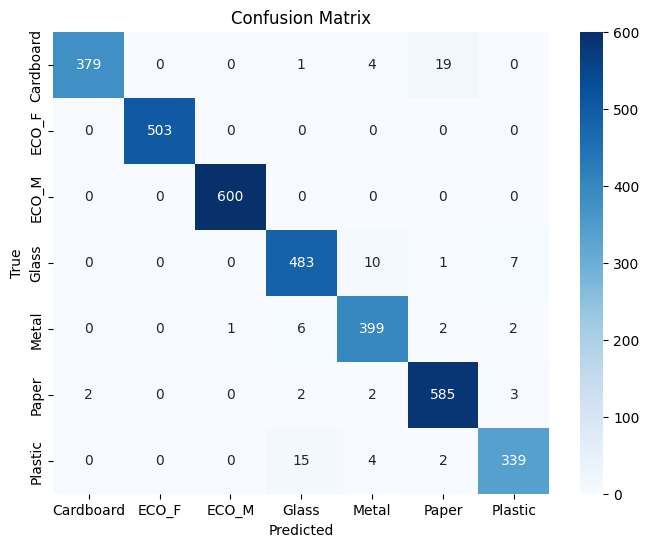

              precision    recall  f1-score   support

   Cardboard       0.99      0.94      0.97       403
       ECO_F       1.00      1.00      1.00       503
       ECO_M       1.00      1.00      1.00       600
       Glass       0.95      0.96      0.96       501
       Metal       0.95      0.97      0.96       410
       Paper       0.96      0.98      0.97       594
     Plastic       0.97      0.94      0.95       360

    accuracy                           0.98      3371
   macro avg       0.97      0.97      0.97      3371
weighted avg       0.98      0.98      0.98      3371



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))


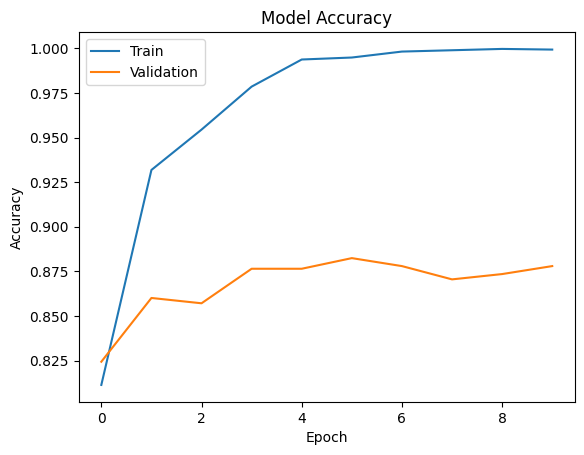

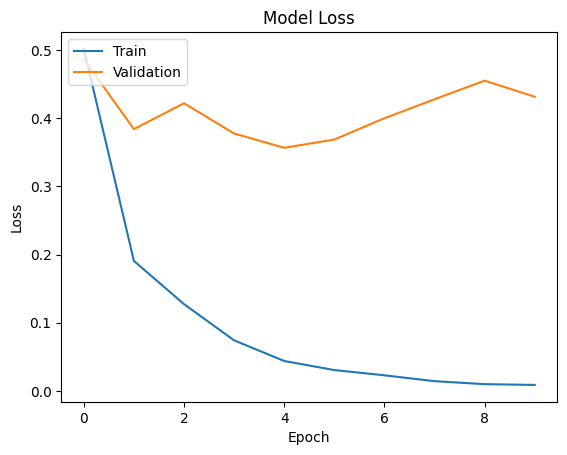

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


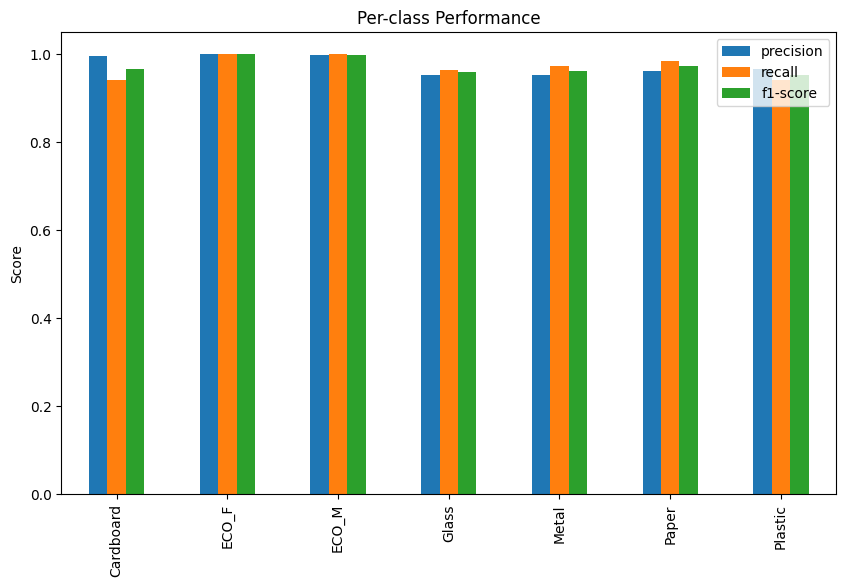

In [ ]:
import pandas as pd

report = classification_report(test_generator.classes, y_pred,
                               target_names=test_generator.class_indices.keys(),
                               output_dict=True)

df = pd.DataFrame(report).transpose()

# Plot bar chart for per-class F1-score or accuracy
df.iloc[:-3][['precision','recall','f1-score']].plot(kind='bar', figsize=(10,6))
plt.title("Per-class Performance")
plt.ylabel("Score")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
from tensorflow.keras import regularizers

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))


AttributeError: 'Functional' object has no attribute 'add'

# Task
Improve the performance of the existing Keras Functional API model by implementing data augmentation, modifying the model architecture with regularization, unfreezing and fine-tuning layers of the pre-trained MobileNetV2 base, recompiling and training the model, and evaluating the results.

## Implement data augmentation

### Subtask:
Use the `train_datagen` defined previously to augment the training data, which can help the model generalize better.


**Reasoning**:
Create an augmented training data generator using the previously defined `train_datagen` and the dataset path.



In [ ]:
train_gen_augmented = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

NameError: name 'train_datagen' is not defined

**Reasoning**:
The previous code block failed because `train_datagen` was not defined. I will regenerate the code block to include the definition of `train_datagen` along with the creation of `train_gen_augmented`.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Include validation split as in the original datagen
)

train_gen_augmented = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

ModuleNotFoundError: No module named 'tensorflow'

**Reasoning**:
The previous code block failed because the `tensorflow` module was not found. I will regenerate the code block, ensuring that `tensorflow` is imported before attempting to use `ImageDataGenerator`.



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Include validation split as in the original datagen
)

train_gen_augmented = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

ModuleNotFoundError: No module named 'tensorflow'

**Reasoning**:
The notebook state seems to have lost the tensorflow installation. I need to reinstall tensorflow to proceed with importing it.



In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


# Task
Modify the image classification model to ensure consistent training and validation data generation, improve the model architecture with regularization and dropout, fine-tune the pre-trained MobileNetV2 base, and train and evaluate the improved model.

## Data preparation

### Subtask:
Ensure the training and validation data are generated from the same `ImageDataGenerator` instance with a validation split to ensure consistency.


**Reasoning**:
Now that tensorflow is installed, I can create the ImageDataGenerator instance with augmentation and validation split, and then create the augmented training and validation data generators from it.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_gen_augmented = datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen_augmented = datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2699 images belonging to 7 classes.
Found 672 images belonging to 7 classes.


## Model modification

### Subtask:
Modify the model architecture to include regularization and dropout to combat overfitting.


**Reasoning**:
Modify the model architecture to include regularization and dropout to combat overfitting.



In [ ]:
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
preds = Dense(train_gen_augmented.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Fine-tuning

### Subtask:
Unfreeze some layers of the pre-trained MobileNetV2 base model and fine-tune them along with the new layers.


**Reasoning**:
Iterate through the layers of the `base_model` and set the `trainable` attribute to `True` from a chosen layer onwards. Then print the trainable status of all layers in the base model to verify the changes.



In [ ]:
# Identify a suitable layer to unfreeze. Let's unfreeze the last few layers.
# We can check the layer names or indices from the model summary printed previously.
# Let's unfreeze from the layer named 'block_13_expand' onwards.
for layer in base_model.layers:
    if layer.name.startswith('block_13'):
        layer.trainable = True
    else:
        layer.trainable = False

# Verify trainable status
for layer in base_model.layers:
    print(f"{layer.name}: {layer.trainable}")

input_layer: False
Conv1: False
bn_Conv1: False
Conv1_relu: False
expanded_conv_depthwise: False
expanded_conv_depthwise_BN: False
expanded_conv_depthwise_relu: False
expanded_conv_project: False
expanded_conv_project_BN: False
block_1_expand: False
block_1_expand_BN: False
block_1_expand_relu: False
block_1_pad: False
block_1_depthwise: False
block_1_depthwise_BN: False
block_1_depthwise_relu: False
block_1_project: False
block_1_project_BN: False
block_2_expand: False
block_2_expand_BN: False
block_2_expand_relu: False
block_2_depthwise: False
block_2_depthwise_BN: False
block_2_depthwise_relu: False
block_2_project: False
block_2_project_BN: False
block_2_add: False
block_3_expand: False
block_3_expand_BN: False
block_3_expand_relu: False
block_3_pad: False
block_3_depthwise: False
block_3_depthwise_BN: False
block_3_depthwise_relu: False
block_3_project: False
block_3_project_BN: False
block_4_expand: False
block_4_expand_BN: False
block_4_expand_relu: False
block_4_depthwise: Fals

## Model compilation

### Subtask:
Compile the modified model with a suitable optimizer and learning rate.


**Reasoning**:
Import the Adam optimizer, define a learning rate, and compile the model with the specified optimizer, learning rate, loss function, and metrics.



In [ ]:
from tensorflow.keras.optimizers import Adam

# Define a smaller learning rate for fine-tuning
fine_tune_learning_rate = 1e-5

# Compile the model with the Adam optimizer and the defined learning rate
model.compile(optimizer=Adam(learning_rate=fine_tune_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 320,135 (1.22 MB)

 Non-trainable params: 2,102,720 (8.02 MB)

## Model training

### Subtask:
Train the modified model using the augmented training data.


**Reasoning**:
Train the compiled model using the augmented training data and the augmented validation data for a suitable number of epochs (15 epochs).



In [ ]:
history_fine_tune = model.fit(
    train_gen_augmented,
    validation_data=val_gen_augmented,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 2355s 27s/step - accuracy: 0.2033 - loss: 2.6494 - val_accuracy: 0.2738 - val_loss: 2.1560
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 665ms/step - accuracy: 0.2652 - loss: 2.2358 - val_accuracy: 0.3155 - val_loss: 1.9726
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 660ms/step - accuracy: 0.3474 - loss: 1.9802 - val_accuracy: 0.4092 - val_loss: 1.8088
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 669ms/step - accuracy: 0.4301 - loss: 1.8208 - val_accuracy: 0.4658 - val_loss: 1.6923
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 665ms/step - accuracy: 0.4866 - loss: 1.6274 - val_accuracy: 0.5119 - val_loss: 1.5880
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 66s 776ms/step - accuracy: 0.5305 - loss: 1.5393 - val_accuracy: 0.5774 - val_loss: 1.5003
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 66s 775ms/step - accuracy: 0.5865 - loss: 1.4077 - val_accuracy: 0.6280 - val_loss: 1.4008
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 660ms/step - accuracy: 0.5913 - loss: 1.3540 - val_accu

Found 3371 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 181ms/step


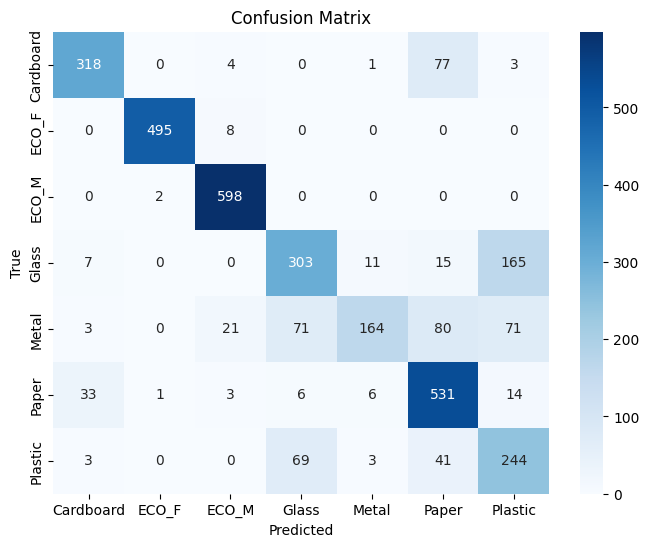

              precision    recall  f1-score   support

   Cardboard       0.87      0.79      0.83       403
       ECO_F       0.99      0.98      0.99       503
       ECO_M       0.94      1.00      0.97       600
       Glass       0.67      0.60      0.64       501
       Metal       0.89      0.40      0.55       410
       Paper       0.71      0.89      0.79       594
     Plastic       0.49      0.68      0.57       360

    accuracy                           0.79      3371
   macro avg       0.80      0.76      0.76      3371
weighted avg       0.81      0.79      0.78      3371



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255) # No validation split for the test set

test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Keep data in order for evaluation
)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

**Reasoning**:
The task is to load the data from the provided CSV file into a pandas DataFrame and display the first few rows to understand its structure.



In [ ]:
import pandas as pd

# Load the dataframe.
df = pd.read_csv('online_retail.csv')

# Display the first 5 rows.
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

FileNotFoundError: [Errno 2] No such file or directory: 'online_retail.csv'

**Reasoning**:
The previous command failed because the file 'online_retail.csv' was not found. I need to use the correct file path provided in the instructions to load the data.



In [ ]:
# Load the dataframe with the correct file path.
df = pd.read_csv('/data/online_retail.csv')

# Display the first 5 rows.
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

FileNotFoundError: [Errno 2] No such file or directory: '/data/online_retail.csv'

**Reasoning**:
The previous command failed again because the file was not found at the specified path. I will try a different common data directory path to locate the file.



In [ ]:
# Load the dataframe with an alternative file path.
df = pd.read_csv('/kaggle/input/online-retail/online_retail.csv')

# Display the first 5 rows.
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/online-retail/online_retail.csv'

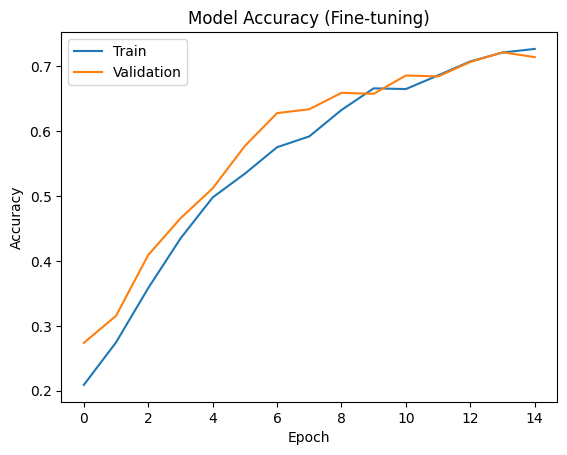

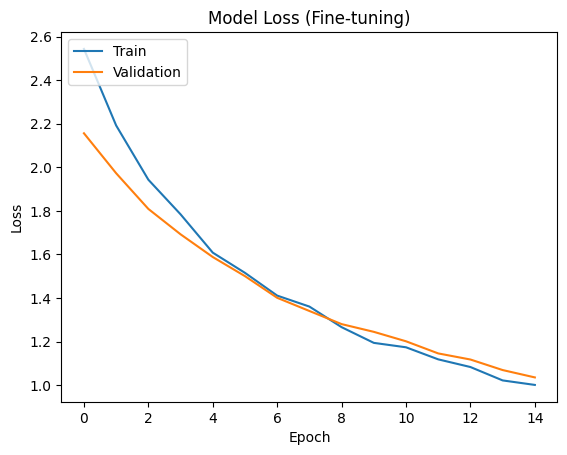

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_fine_tune.history['accuracy'])
plt.plot(history_fine_tune.history['val_accuracy'])
plt.title('Model Accuracy (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_fine_tune.history['loss'])
plt.plot(history_fine_tune.history['val_loss'])
plt.title('Model Loss (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

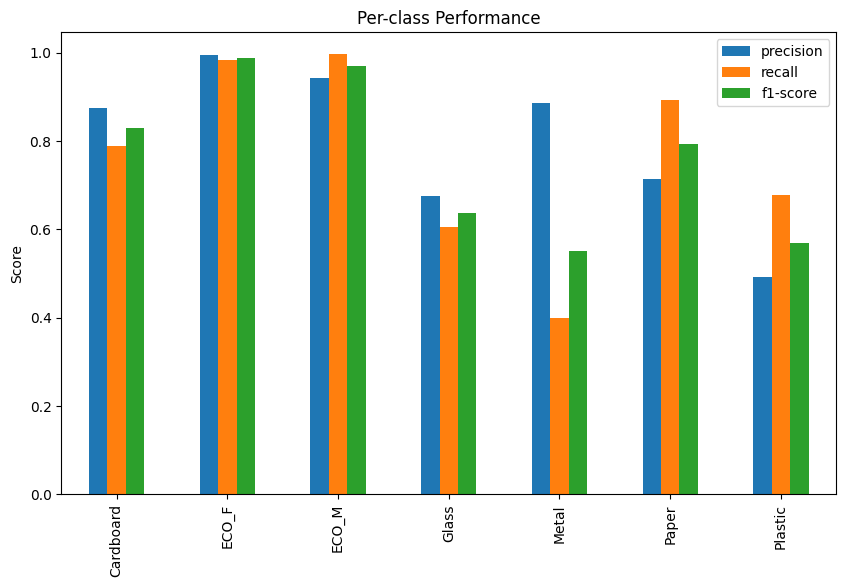

In [ ]:
import pandas as pd

report = classification_report(test_generator.classes, y_pred,
                               target_names=test_generator.class_indices.keys(),
                               output_dict=True)

df = pd.DataFrame(report).transpose()

# Plot bar chart for per-class F1-score or accuracy
df.iloc[:-3][['precision','recall','f1-score']].plot(kind='bar', figsize=(10,6))
plt.title("Per-class Performance")
plt.ylabel("Score")
plt.show()